In [1]:
import ccxt
import pprint

# with open("../binance.key") as f:
#     lines = f.readlines()
#     api_key = lines[0].strip()
#     api_secret = lines[1].strip()
   

api_key = "3o8od3V5ePVCnZ19u34KydThmSgbD2ekCV4yD9ZclRogzMvMl4RPFlfLW8fVpzFX"
api_secret = "ZRzqHcLKS7Lnemy5cwM2Cck0HRnguN59jQvzAqrrXAoZvGwS9AKZk1dHbvZqBXyA"

exchange = ccxt.binance(config={
    'apiKey': api_key,
    'secret': api_secret,
    'enableRateLimit': True,
    'options': {
        'defaultType': 'future'       # 선물 거래
    }
})
print(exchange)

markets = exchange.load_markets()
# pprint.pprint(markets)
# print(len(markets.keys()))
tickers = exchange.fetch_tickers()

# :usdt 종목 선별
symbols = tickers.keys()
usdt_symbols = [x for x in symbols if x.endswith("USDT")]

Binance


In [2]:
import pandas as pd

# usdt_symbols = ['BTC/USDT:USDT']
# symbol = 'BTC/USDT:USDT'
timeframe = '1d'

# pprint.pprint(ohlcv)

# 각 코인의 가격 데이터를 저장할 딕셔너리
prices_data = {}

# 각 심볼에 대해 OHLCV 데이터를 가져와서 딕셔너리에 저장
for symbol in usdt_symbols:
    ohlcv = exchange.fetch_ohlcv(symbol=symbol, timeframe=timeframe, limit=2000)
    df = pd.DataFrame(ohlcv, columns=['datetime', 'open', 'high', 'low', 'close', 'volume'])
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')  # timestamp를 datetime으로 변환
    
    if len(df) > 365:
        print(symbol)
        prices_data[symbol] = df
# print(df)

STORJ/USDT:USDT
ARPA/USDT:USDT
CELR/USDT:USDT
XRP/USDT:USDT
QNT/USDT:USDT
GRT/USDT:USDT
MASK/USDT:USDT
ICX/USDT:USDT
QTUM/USDT:USDT
BEL/USDT:USDT
EGLD/USDT:USDT
IOTA/USDT:USDT
UNFI/USDT:USDT
BTCDOM/USDT:USDT
BCH/USDT:USDT
ETC/USDT:USDT
FTM/USDT:USDT
SNX/USDT:USDT
LRC/USDT:USDT
ATA/USDT:USDT
TRX/USDT:USDT
XLM/USDT:USDT
1000SHIB/USDT:USDT
DEFI/USDT:USDT
APT/USDT:USDT
WAVES/USDT:USDT
STG/USDT:USDT
UNI/USDT:USDT
MATIC/USDT:USDT
RLC/USDT:USDT
ETH/USDT:USDT
BAT/USDT:USDT
ONE/USDT:USDT
INJ/USDT:USDT
RVN/USDT:USDT
ALPHA/USDT:USDT
EOS/USDT:USDT
JASMY/USDT:USDT
ANT/USDT:USDT
AAVE/USDT:USDT
REN/USDT:USDT
CHZ/USDT:USDT
1000XEC/USDT:USDT
ZEN/USDT:USDT
LINA/USDT:USDT
COMP/USDT:USDT
AXS/USDT:USDT
IOTX/USDT:USDT
DOT/USDT:USDT
MKR/USDT:USDT
CTK/USDT:USDT
FLOW/USDT:USDT
ENS/USDT:USDT
BTC/USDT:USDT
ZIL/USDT:USDT
PEOPLE/USDT:USDT
XMR/USDT:USDT
OGN/USDT:USDT
NEAR/USDT:USDT
API3/USDT:USDT
BAND/USDT:USDT
ROSE/USDT:USDT
GALA/USDT:USDT
OMG/USDT:USDT
TOMO/USDT:USDT
NKN/USDT:USDT
THETA/USDT:USDT
SUSHI/USDT:USDT


In [3]:
sym_list = []
for key in prices_data:
    sym_list.append(key)

In [233]:
data = prices_data['BTC/USDT:USDT']

In [69]:
# 데이터의 처음 몇 행 확인
print(data.head())

# 데이터 요약 통계 확인
print(data.describe())


    datetime     open     high      low    close      volume
0 2019-11-01  9149.88  9280.00  9050.27  9231.01   87256.949
1 2019-11-02  9231.70  9375.00  9194.98  9287.80   56602.055
2 2019-11-03  9288.96  9366.69  9073.00  9197.88   75612.722
3 2019-11-04  9197.86  9550.00  9126.01  9395.46   90433.357
4 2019-11-05  9395.47  9457.13  9164.33  9313.20  113738.226
                            datetime          open          high  \
count                           1500   1500.000000   1500.000000   
mean   2021-11-19 12:00:00.000000256  27790.615660  28512.338487   
min              2019-11-01 00:00:00   4762.280000   5361.260000   
25%              2020-11-09 18:00:00  15561.512500  15955.400000   
50%              2021-11-19 12:00:00  26563.850000  27064.250000   
75%              2022-11-29 06:00:00  38538.585000  39876.450000   
max              2023-12-09 00:00:00  67606.960000  69198.700000   
std                              NaN  15381.710524  15832.622733   

                low  

In [234]:
len(data)

1500

In [235]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 윈도우 사이즈
window_size = 30

# 윈도우에 따른 데이터 정규화 함수 정의
def window_scaler(window_data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(window_data)

columns = ['open', 'high', 'low', 'close', 'volume']
scaled_data = []

for start in range(len(data) - window_size):
    end = start + window_size
    window_data = data[columns][start:end]
    scaled_window_data = window_scaler(window_data)
    scaled_data.append(scaled_window_data)

# 리스트를 numpy 배열로 변환
scaled_data = np.array(scaled_data)

# 예측할 조건 설정
forecast_days = 7  # 예측하려는 일수

# 특성(Features)과 레이블(Labels)을 위한 빈 리스트 생성
features = []
labels = []

# 예측 조건에 따른 레이블 생성
for i in range(len(scaled_data) - forecast_days):
    features.append(scaled_data[i])
    close_today = data['close'][i + window_size - 1]
    close_future = data['close'][i + window_size + forecast_days - 1]
    labels.append(int(close_future > close_today))

# numpy 배열로 변환
features = np.array(features)
labels = np.array(labels)

from sklearn.model_selection import train_test_split

# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 모델 생성
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 데이터 차원 변경:
nsamples, nx, ny = X_train.shape
X_train_2d = X_train.reshape((nsamples, nx*ny))

# 모델 학습
model.fit(X_train_2d, y_train)

#테스트 데이터
nsamples, nx, ny = X_test.shape
X_test_2d = X_test.reshape((nsamples, nx*ny))


# 성능 평가
predictions = model.predict(X_test_2d)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.64      0.58      0.61       143
           1       0.63      0.69      0.66       150

    accuracy                           0.63       293
   macro avg       0.64      0.63      0.63       293
weighted avg       0.64      0.63      0.63       293

[[ 83  60]
 [ 47 103]]


In [236]:
len(scaled_data)

1470

In [220]:
# 과거 주식 데이터 로드
historical_data = data[:200]
# 데이터 정규화 및 특성 생성
scaled_historical_data = []
for start in range(len(historical_data) - window_size):
    end = start + window_size
    window_data = historical_data[columns][start:end]
    scaled_window_data = window_scaler(window_data)
    scaled_historical_data.append(scaled_window_data)

scaled_historical_data = np.array(scaled_historical_data)

# 특성 생성
historical_features = []
for i in range(len(scaled_historical_data) - forecast_days):
    historical_features.append(scaled_historical_data[i])

historical_features = np.array(historical_features)

# 백테스팅을 위한 데이터 차원 변경
nsamples, nx, ny = historical_features.shape
historical_features_2d = historical_features.reshape((nsamples, nx*ny))

# 모델로 과거 데이터 예측
historical_predictions = model.predict(historical_features_2d)

import matplotlib.pyplot as plt

# # 백테스팅 시뮬레이션
# initial_capital = 100000.0
# capital = initial_capital
# positions = 0
# capital_history = [capital]  # 자본 변화 기록
# profit_history = []
# bet_size = 1000

# for i in range(window_size + forecast_days - 1, len(historical_predictions)):
#     if historical_predictions[i - (window_size + forecast_days - 1)] == 1:
#         # 상승 예측: 매수 포지션
#         if capital >= bet_size:
#             profit = bet_size * (historical_data['close'][i] / historical_data['close'][i - forecast_days] - 1)
#             profit_history.append(profit)
#             capital += profit  # 수익 추가
#     elif historical_predictions[i - (window_size + forecast_days - 1)] == 0:
#         # 하락 예측: 매도 포지션
#         if capital >= bet_size:
#             profit = bet_size * (1 - historical_data['close'][i] / historical_data['close'][i - forecast_days])
#             profit_history.append(profit)
#             capital += profit  # 수익 추가
#     capital_history.append(capital)

# # 최종 수익 계산
# final_capital = capital + positions * historical_data['close'].iloc[-1]
# print(f"Initial Capital: {initial_capital}, Final Capital: {final_capital}")


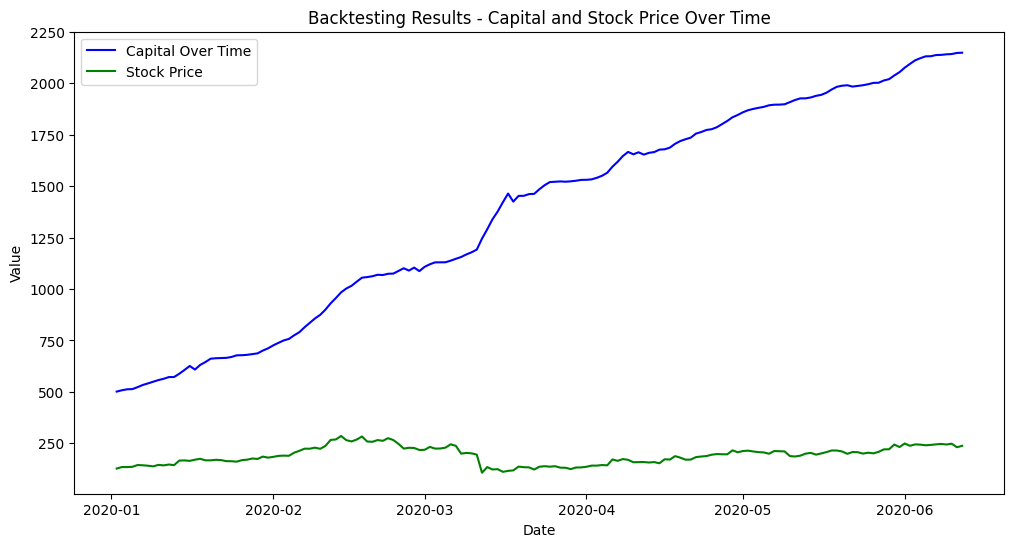

In [223]:
dates = historical_data['datetime'][window_size + forecast_days - 1:len(historical_predictions) + window_size + forecast_days - 1]

# 백테스팅 시뮬레이션
initial_capital = 500.0
capital = initial_capital
capital_history = []  # 초기 자본을 리스트에 추가
profit_history = []
bet_size = 100

# historical_predictions의 길이에 맞게 반복
for i in range(len(historical_predictions)):
    # 예측에 해당하는 실제 인덱스 계산
    actual_index = i + window_size + forecast_days - 1
    if historical_predictions[i] == 1:
        # 상승 예측: 매수 포지션
        if capital >= bet_size:
            profit = bet_size * (historical_data['close'][actual_index] / historical_data['close'][actual_index - forecast_days] - 1)
            profit_history.append(profit)
            capital += profit  # 수익 추가
    elif historical_predictions[i] == 0:
        # 하락 예측: 매도 포지션
        if capital >= bet_size:
            profit = bet_size * (1 - historical_data['close'][actual_index] / historical_data['close'][actual_index - forecast_days])
            profit_history.append(profit)
            capital += profit  # 수익 추가

    capital_history.append(capital)

# dates 리스트 생성
dates = historical_data['datetime'][window_size + forecast_days - 1: window_size + forecast_days - 1 + len(historical_predictions)]

# 자본 변화 시각화
plt.figure(figsize=(12, 6))
plt.plot(dates, capital_history, label='Capital Over Time', color='blue')
plt.plot(dates, historical_data['close'][window_size + forecast_days - 1:window_size + forecast_days - 1 + len(historical_predictions)], label='Stock Price', color='green')
plt.title('Backtesting Results - Capital and Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [225]:
len(scaled_data)

1444

In [226]:
window_size

30

In [227]:
forecast_days

7

In [222]:
profit_history

[1.258663267744753,
 6.402028365422696,
 4.764136207435166,
 0.7819481680071627,
 9.519464720194627,
 10.641263940520451,
 7.755320777828811,
 8.354968137833364,
 7.8263459676819025,
 6.15774563888476,
 8.305623291214047,
 0.31935573451817856,
 16.036679266414676,
 18.365896980461805,
 19.34219124373775,
 -17.44475138121546,
 22.492977528089895,
 13.96602306065362,
 16.332358267168125,
 2.262170477167169,
 0.9543817527010834,
 0.8517369349638093,
 4.369046218981543,
 7.974545663016686,
 0.5148467432950277,
 1.9038496078548794,
 3.7517697026899333,
 3.335513407455859,
 13.603730747990417,
 10.766771198425861,
 14.51532519312233,
 12.32281119714116,
 11.579813171964037,
 7.4653172617693775,
 17.433831990794,
 15.19390731338448,
 24.109026312867776,
 21.62441518877163,
 21.236544885730947,
 17.433656276326893,
 25.47484260092059,
 30.44585987261148,
 25.88737281380411,
 27.65576776848413,
 18.566891801225573,
 13.221658502449273,
 20.163206743487414,
 19.31185697419462,
 2.933443509615385

In [202]:
# 예측 성공률 계산
# 예측 성공: 매수 예측 후 주가 상승, 매도 예측 후 주가 하락

# 날짜 데이터 준비
dates = historical_data['datetime'][window_size + forecast_days - 1:len(historical_predictions) + window_size + forecast_days - 1]

correct_predictions = [1 if (historical_predictions[i - (window_size + forecast_days - 1)] == 1 and historical_data['close'][i] > historical_data['close'][i - forecast_days]) or 
                            (historical_predictions[i - (window_size + forecast_days - 1)] == 0 and historical_data['close'][i] < historical_data['close'][i - forecast_days]) 
                            else 0 
                      for i in range(window_size + forecast_days - 1, len(historical_predictions))]

# DataFrame 생성
backtesting_df = pd.DataFrame({
    'Date': dates,
    'Stock Price': historical_data['close'][window_size + forecast_days - 1:len(historical_predictions) + window_size + forecast_days - 1],
    'Capital': capital_history[1:],
    'Profit': profit_history,
    'Prediction Correct': correct_predictions
})

# 결과 출력
print(backtesting_df.head())


ValueError: array length 171 does not match index length 185

In [203]:
len(dates)

185

In [204]:
len(capital_history)

172

In [175]:
(window_size + forecast_days - 1) - (window_size + forecast_days - 1)

0

In [183]:
len(dates) - len(capital_history)

50

In [184]:
forecast_days

7

In [173]:
len(capital_history)

1398

ValueError: x and y must have same first dimension, but have shapes (1448,) and (1398,)

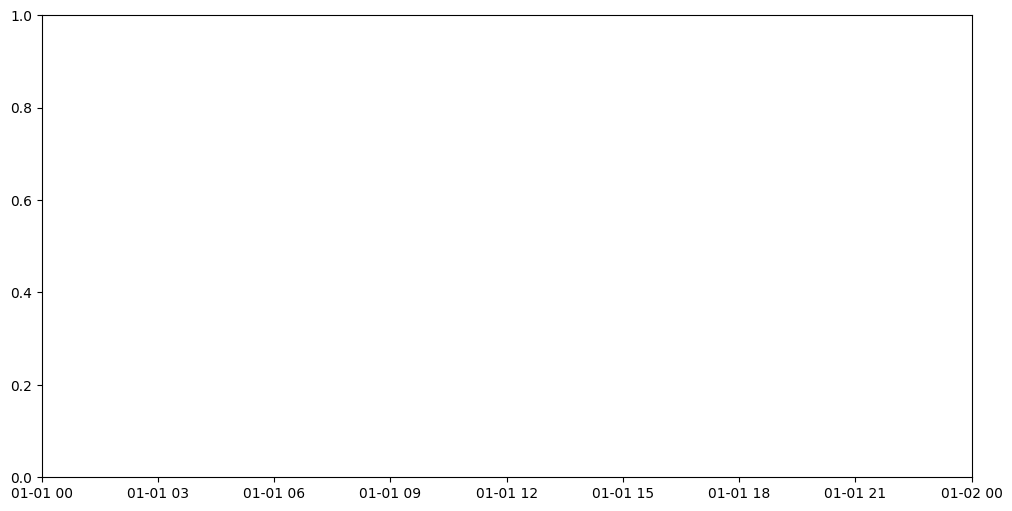

In [170]:
# dates 리스트 길이 조정
dates = historical_data['datetime'][window_size + forecast_days - 1:window_size + forecast_days - 1 + len(historical_predictions)]

# capital_history 리스트 길이 확인 및 조정 (필요한 경우)
if len(capital_history) != len(dates):
    # capital_history의 길이가 dates의 길이와 다르면, dates 길이에 맞춰 조정
    capital_history = capital_history[:len(dates)]
    
# 자본 변화 시각화
plt.figure(figsize=(12, 6))
plt.plot(dates, capital_history, label='Capital Over Time', color='blue')

# 주가 데이터 시각화
plt.plot(dates, historical_data['close'][window_size + forecast_days - 1:len(historical_predictions) + window_size + forecast_days - 1], label='Stock Price', color='green')

plt.title('Backtesting Results - Capital and Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [218]:
# 예측 성공률 계산
# 예측 성공: 매수 예측 후 주가 상승, 매도 예측 후 주가 하락
correct_predictions = [1 if (historical_predictions[i - (window_size + forecast_days - 1)] == 1 and historical_data['close'][i] > historical_data['close'][i - forecast_days]) or 
                            (historical_predictions[i - (window_size + forecast_days - 1)] == 0 and historical_data['close'][i] < historical_data['close'][i - forecast_days]) 
                            else 0 
                      for i in range(window_size + forecast_days - 1, len(historical_predictions))]

# DataFrame 생성
backtesting_df = pd.DataFrame({
    'Date': dates,
    'Stock Price': historical_data['close'][window_size + forecast_days - 1:len(historical_predictions) + window_size + forecast_days - 1],
    'Capital': capital_history[1:],
    'Profit': profit_history,
    'Prediction Correct': correct_predictions
})

# 결과 출력
print(backtesting_df.head())


ValueError: All arrays must be of the same length

In [165]:
len(capital_history)

1398

In [166]:
window_size

45

In [167]:
forecast_days

7

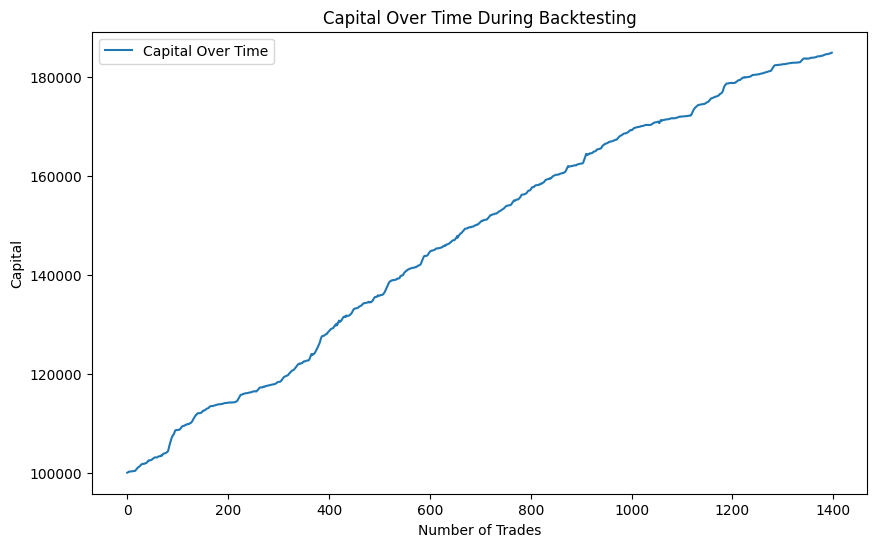

In [142]:
# 자본 변화 시각화
plt.figure(figsize=(10, 6))
plt.plot(capital_history, label='Capital Over Time')
plt.title('Capital Over Time During Backtesting')
plt.xlabel('Number of Trades')
plt.ylabel('Capital')
plt.legend()
plt.show()


In [140]:
# 시간 데이터 추적
dates = historical_data['datetime'][window_size + forecast_days - 1:].reset_index(drop=True)


ValueError: x and y must have same first dimension, but have shapes (1449,) and (1398,)

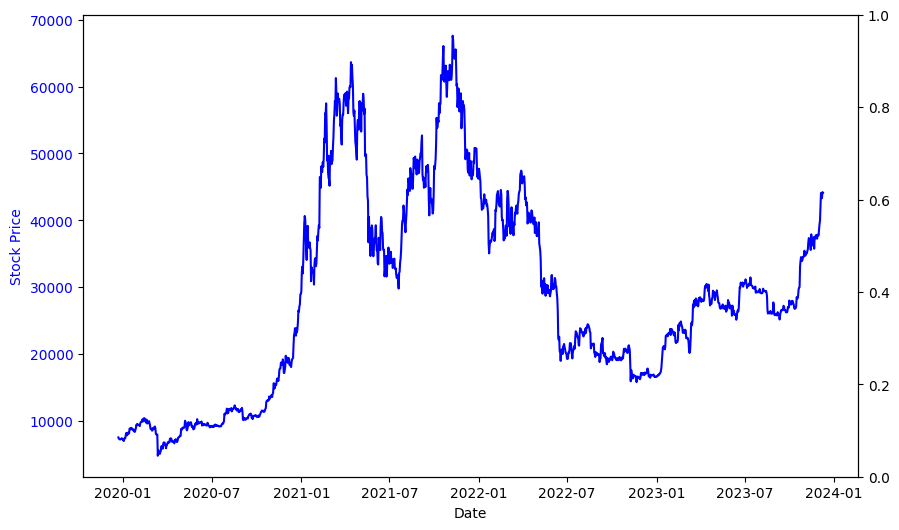

In [143]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 축: 주식 가격
ax1.plot(dates, historical_data['close'][window_size + forecast_days - 1:], color='blue', label='Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 축: 자본 변화
ax2 = ax1.twinx()  # 같은 x축을 공유하는 두 번째 y축 생성
ax2.plot(dates, capital_history, color='green', label='Capital Over Time')
ax2.set_ylabel('Capital', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 제목 및 레이블
plt.title('Stock Price and Capital Over Time')
fig.tight_layout()  # 레이아웃 조정
plt.show()


In [90]:
historical_data['close'][window_size + forecast_days - 1:]

51       7502.92
52       7314.01
53       7252.04
54       7201.45
55       7197.46
          ...   
1495    44081.70
1496    43774.80
1497    43296.00
1498    44209.50
1499    44131.80
Name: close, Length: 1449, dtype: float64

In [78]:
# 매수 및 매도 포인트 기록
buy_signals = []
sell_signals = []

for i in range(len(historical_predictions)):
    if historical_predictions[i] == 1 and capital >= historical_data['close'][i + window_size + forecast_days - 1]:
        positions += 1
        capital -= historical_data['close'][i + window_size + forecast_days - 1]
        buy_signals.append(i)  # 매수 포인트 기록
    elif positions > 0 and historical_predictions[i] == 0:
        capital += positions * historical_data['close'][i + window_size + forecast_days - 1]
        positions = 0
        sell_signals.append(i)  # 매도 포인트 기록
    capital_history.append(capital + positions * historical_data['close'][i + window_size + forecast_days - 1])


In [82]:
# 날짜 범위 설정
start_date = '2021-01-01'
end_date = '2021-12-31'

# 날짜 범위에 해당하는 인덱스 찾기
start_idx = dates[dates == start_date].index[0]
end_idx = dates[dates == end_date].index[0]

# 날짜와 자본 기록 필터링
filtered_dates = dates[start_idx:end_idx + 1]
filtered_capital_history = capital_history[start_idx:end_idx + 1]

# 매수 및 매도 신호 필터링
filtered_buy_signals = [i for i in buy_signals if start_idx <= i <= end_idx]
filtered_sell_signals = [i for i in sell_signals if start_idx <= i <= end_idx]

# 인덱스를 기반으로 필터링된 날짜에 맞춰 인덱스 조정
filtered_buy_signals = [i - start_idx for i in filtered_buy_signals]
filtered_sell_signals = [i - start_idx for i in filtered_sell_signals]


# # 날짜 필터링
# filtered_dates = dates[(dates >= start_date) & (dates <= end_date)]
# filtered_capital_history = capital_history[(dates >= start_date) & (dates <= end_date)]
# filtered_buy_signals = [i for i in buy_signals if start_date <= dates[i] <= end_date]
# filtered_sell_signals = [i for i in sell_signals if start_date <= dates[i] <= end_date]


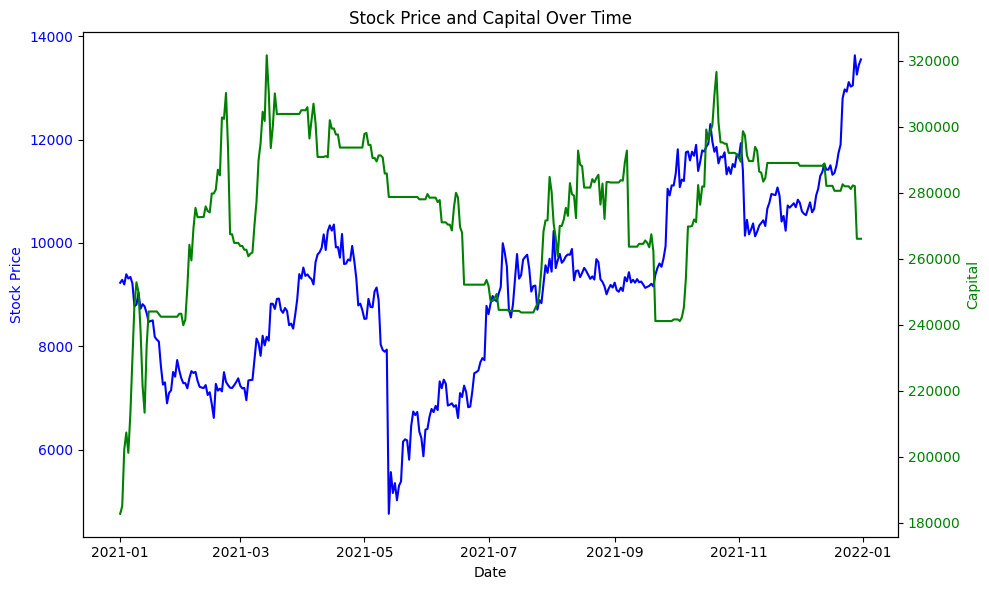

In [88]:
# 날짜 필터링 및 인덱스 재설정
filtered_dates = dates[(dates >= start_date) & (dates <= end_date)].reset_index(drop=True)

# 필터링된 날짜에 맞는 인덱스 계산 (오류 처리 추가)
filtered_buy_signals_idx = []
for i in filtered_buy_signals:
    try:
        signal_date = dates[i]
        if signal_date in filtered_dates.values:
            idx = filtered_dates[filtered_dates == signal_date].index[0]
            filtered_buy_signals_idx.append(idx)
    except IndexError:
        continue

filtered_sell_signals_idx = []
for i in filtered_sell_signals:
    try:
        signal_date = dates[i]
        if signal_date in filtered_dates.values:
            idx = filtered_dates[filtered_dates == signal_date].index[0]
            filtered_sell_signals_idx.append(idx)
    except IndexError:
        continue

# # 필터링된 날짜에 맞는 인덱스 계산
# filtered_buy_signals_idx = [filtered_dates.index[filtered_dates == dates[i]].tolist()[0] for i in filtered_buy_signals]
# filtered_sell_signals_idx = [filtered_dates.index[filtered_dates == dates[i]].tolist()[0] for i in filtered_sell_signals]



# 차트 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 축: 주식 가격
ax1.plot(filtered_dates, historical_data['close'][filtered_dates.index], color='blue', label='Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 매수 및 매도 포인트 표시
ax1.scatter(filtered_dates[filtered_buy_signals_idx], historical_data['close'][filtered_dates.index][filtered_buy_signals_idx], color='green', label='Buy Signal', marker='^')
ax1.scatter(filtered_dates[filtered_sell_signals_idx], historical_data['close'][filtered_dates.index][filtered_sell_signals_idx], color='red', label='Sell Signal', marker='v')

# 두 번째 축: 자본 변화
ax2 = ax1.twinx()  
ax2.plot(filtered_dates, filtered_capital_history, color='green', label='Capital Over Time')
ax2.set_ylabel('Capital', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 제목 및 레이블
plt.title('Stock Price and Capital Over Time')
fig.tight_layout()
plt.show()
